In [22]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
%matplotlib inline

In [23]:
df = pd.read_csv('studentdata1.csv')
df.head()

,Names,Time,Points
0,John,15,1000
1,Donald,16,925
2,Marilyn,17,935
3,Talia,18,950
4,Leonie,19,996


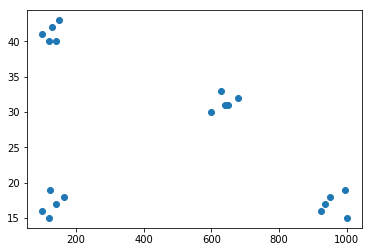

In [24]:
plt.scatter(df['Points'], df['Time'])

In [25]:
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
y_predicted = km.fit_predict(df[['Time', 'Points']])
y_predicted

array([0, 3, 3, 3, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [27]:
df['cluster'] = y_predicted
df.head()

,Names,Time,Points,cluster
0,John,15,1000,0
1,Donald,16,925,3
2,Marilyn,17,935,3
3,Talia,18,950,3
4,Leonie,19,996,0


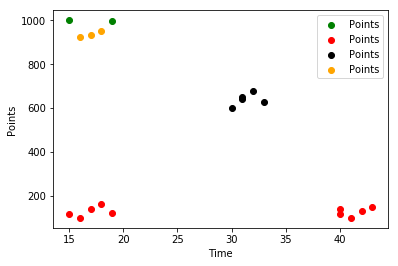

In [28]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['Time'], df1['Points'], color='green')
plt.scatter(df2['Time'], df2['Points'], color='red')
plt.scatter(df3['Time'], df3['Points'], color='black')
plt.scatter(df4['Time'], df4['Points'], color='orange')

plt.xlabel('Time')
plt.ylabel('Points')
plt.legend()

In [29]:
df[['Points', 'Time']].to_numpy

<bound method DataFrame.to_numpy of     Points  Time
0     1000    15
1      925    16
2      935    17
3      950    18
4      996    19
5      600    30
6      650    31
7      680    32
8      640    31
9      630    33
10     120    40
11     100    41
12     130    42
13     150    43
14     140    40
15     120    15
16     100    16
17     140    17
18     165    18
19     123    19>

In [30]:
scaler = MinMaxScaler()
scaler.fit(df[['Points', 'Time']])
array_points = df[['Points', 'Time']].to_numpy().reshape(-1, 2)
data = scaler.transform(array_points)
data

array([[1.        , 0.        ],
       [0.91666667, 0.03571429],
       [0.92777778, 0.07142857],
       [0.94444444, 0.10714286],
       [0.99555556, 0.14285714],
       [0.55555556, 0.53571429],
       [0.61111111, 0.57142857],
       [0.64444444, 0.60714286],
       [0.6       , 0.57142857],
       [0.58888889, 0.64285714],
       [0.02222222, 0.89285714],
       [0.        , 0.92857143],
       [0.03333333, 0.96428571],
       [0.05555556, 1.        ],
       [0.04444444, 0.89285714],
       [0.02222222, 0.        ],
       [0.        , 0.03571429],
       [0.04444444, 0.07142857],
       [0.07222222, 0.10714286],
       [0.02555556, 0.14285714]])

In [31]:
dfdata = pd.DataFrame(data)

In [32]:
dfdata.columns=['Points', 'Time']

In [33]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(dfdata[['Time', 'Points']])
dfdata['cluster'] = y_predicted

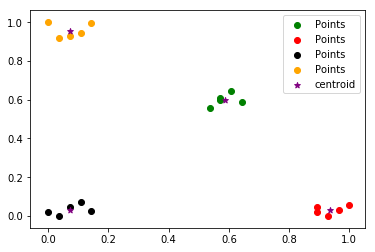

In [37]:
df1 = dfdata[dfdata.cluster==0]
df2 = dfdata[dfdata.cluster==1]
df3 = dfdata[dfdata.cluster==2]
df4 = dfdata[dfdata.cluster==3]

plt.scatter(df1['Time'], df1['Points'], color='green')
plt.scatter(df2['Time'], df2['Points'], color='red')
plt.scatter(df3['Time'], df3['Points'], color='black')
plt.scatter(df4['Time'], df4['Points'], color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()